In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import numpy as np

In [5]:
df = pd.read_csv('spam_ham_category.csv')
df

,Unnamed: 0,Category,Message
0,0,ham,Good Morning my Dear........... Have a great &...
1,1,ham,Ugh I don't wanna get out of bed. It's so warm.
2,2,ham,You should change your fb to jaykwon thuglyfe ...
3,3,ham,Ok I'm gonna head up to usf in like fifteen mi...
4,4,spam,Congratulations ur awarded 500 of CD vouchers ...
...,...,...,...
1490,1490,spam,PRIVATE! Your 2003 Account Statement for 07808...
1491,1491,ham,Let there be snow. Let there be snow. This kin...
1492,1492,spam,You have WON a guaranteed £1000 cash or a £200...
1493,1493,spam,Hack Chat. Get backdoor entry into 121 chat ro...


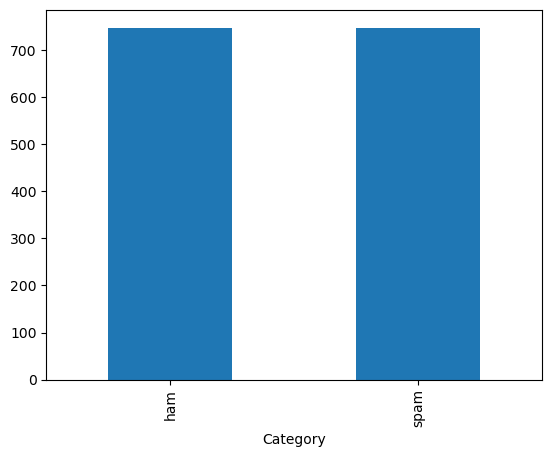

In [6]:
df.groupby('Category').Message.count().plot.bar(ylim = 0)

plt.show()

In [7]:
spam_length = (df['Category'] == ('spam')).sum()
print(spam_length)


747


In [9]:
# Create a boolean series where each 'ham' entry is True
is_ham = df['Category'] == 'ham'

# Filter the DataFrame to keep only 'ham' entries
ham_df = df[is_ham]

# Take the first 748 entries of the filtered DataFrame
ham_reduced = ham_df.iloc[0:748]
ham_reduced


,Unnamed: 0,Category,Message
0,0,ham,Good Morning my Dear........... Have a great &...
1,1,ham,Ugh I don't wanna get out of bed. It's so warm.
2,2,ham,You should change your fb to jaykwon thuglyfe ...
3,3,ham,Ok I'm gonna head up to usf in like fifteen mi...
5,5,ham,Did you catch the bus ? Are you frying an egg ...
...,...,...,...
1486,1486,ham,Booked ticket for pongal?
1487,1487,ham,The message sent is askin for &lt;#&gt; dolla...
1489,1489,ham,"I've got &lt;#&gt; , any way I could pick up?"
1491,1491,ham,Let there be snow. Let there be snow. This kin...


In [10]:
# Create a boolean series where each 'ham' entry is True
is_spam = df['Category'] == 'spam'

# Filter the DataFrame to keep only 'ham' entries
spam_df = df[is_spam]

# Take the first 748 entries of the filtered DataFrame
spam_reduced = spam_df.iloc[0:748]
spam_reduced


,Unnamed: 0,Category,Message
4,4,spam,Congratulations ur awarded 500 of CD vouchers ...
6,6,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
8,8,spam,SplashMobile: Choose from 1000s of gr8 tones e...
9,9,spam,Hard LIVE 121 chat just 60p/min. Choose your g...
11,11,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...
...,...,...,...
1483,1483,spam,Free entry in 2 a weekly comp for a chance to ...
1488,1488,spam,Our records indicate u maybe entitled to 5000 ...
1490,1490,spam,PRIVATE! Your 2003 Account Statement for 07808...
1492,1492,spam,You have WON a guaranteed £1000 cash or a £200...


In [11]:
result = pd.concat([ham_reduced, spam_reduced], axis = 0, ignore_index=True)
result

,Unnamed: 0,Category,Message
0,0,ham,Good Morning my Dear........... Have a great &...
1,1,ham,Ugh I don't wanna get out of bed. It's so warm.
2,2,ham,You should change your fb to jaykwon thuglyfe ...
3,3,ham,Ok I'm gonna head up to usf in like fifteen mi...
4,5,ham,Did you catch the bus ? Are you frying an egg ...
...,...,...,...
1490,1483,spam,Free entry in 2 a weekly comp for a chance to ...
1491,1488,spam,Our records indicate u maybe entitled to 5000 ...
1492,1490,spam,PRIVATE! Your 2003 Account Statement for 07808...
1493,1492,spam,You have WON a guaranteed £1000 cash or a £200...


In [12]:
result = result.sample(frac=1).reset_index(drop=True)
result.to_csv('spam_ham_category.csv')
result

,Unnamed: 0,Category,Message
0,170,spam,TBS/PERSOLVO. been chasing us since Sept for£3...
1,558,spam,A £400 XMAS REWARD IS WAITING FOR YOU! Our com...
2,1128,ham,How long does applebees fucking take
3,50,ham,Yeah you should. I think you can use your gt a...
4,319,ham,Meet after lunch la...
...,...,...,...
1490,529,ham,Do you know what Mallika Sherawat did yesterda...
1491,573,ham,This is hoping you enjoyed your game yesterday...
1492,3,ham,Ok I'm gonna head up to usf in like fifteen mi...
1493,1301,spam,You have been specially selected to receive a ...


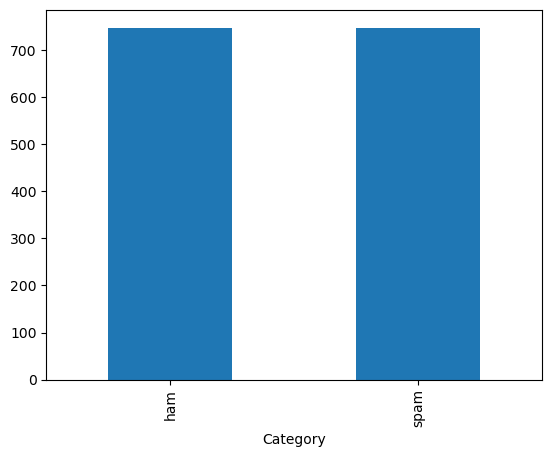

In [13]:
result.groupby('Category').Message.count().plot.bar(ylim = 0)

plt.show()

In [14]:
stemmer = PorterStemmer()

In [15]:
nltk.download('stopwords')
words = stopwords.words("english")
result['cleaned'] = result['Message'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]))
result

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Category,Message,cleaned
0,170,spam,TBS/PERSOLVO. been chasing us since Sept for£3...,tb persolvo chase us sinc sept definit pay tha...
1,558,spam,A £400 XMAS REWARD IS WAITING FOR YOU! Our com...,a xma reward is wait for you our comput random...
2,1128,ham,How long does applebees fucking take,how long applebe fuck take
3,50,ham,Yeah you should. I think you can use your gt a...,yeah i think use gt atm regist not sure anyway...
4,319,ham,Meet after lunch la...,meet lunch la
...,...,...,...,...
1490,529,ham,Do you know what Mallika Sherawat did yesterda...,do know mallika sherawat yesterday find lt url gt
1491,573,ham,This is hoping you enjoyed your game yesterday...,thi hope enjoy game yesterday sorri touch pl k...
1492,3,ham,Ok I'm gonna head up to usf in like fifteen mi...,ok i gonna head usf like fifteen minut
1493,1301,spam,You have been specially selected to receive a ...,you special select receiv award call befor lin...


In [16]:
result = result[['Category', 'cleaned']]
result

,Category,cleaned
0,spam,tb persolvo chase us sinc sept definit pay tha...
1,spam,a xma reward is wait for you our comput random...
2,ham,how long applebe fuck take
3,ham,yeah i think use gt atm regist not sure anyway...
4,ham,meet lunch la
...,...,...
1490,ham,do know mallika sherawat yesterday find lt url gt
1491,ham,thi hope enjoy game yesterday sorri touch pl k...
1492,ham,ok i gonna head usf like fifteen minut
1493,spam,you special select receiv award call befor lin...


In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

vectorizer = TfidfVectorizer()
X = result['cleaned']
Y = result['Category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)
#creating pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])
model = pipeline.fit(X_train, y_train)

In [18]:
y_test.iloc[7:8]

752    spam
Name: Category, dtype: object

In [19]:
predict = model.predict(X_test.iloc[7:8])
predict

array(['spam'], dtype=object)

In [ ]:
data = {'Message': [input('Enter the message = ')] for i in range(1)}
data = pd.DataFrame(data)
data
predict = model.predict(data['Message'])
predict[0]

In [22]:
from sklearn.metrics import accuracy_score
predict = model.predict(X_test)
print(accuracy_score(y_test,predict)*100)
print('\n')


95.55555555555556




In [66]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       111
        spam       0.98      0.98      0.98       114

    accuracy                           0.98       225
   macro avg       0.98      0.98      0.98       225
weighted avg       0.98      0.98      0.98       225

[[109   2]
 [  2 112]]
